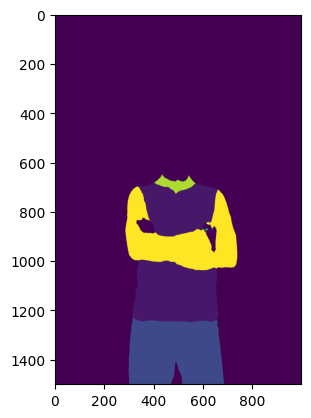

In [3]:
from transformers import SegformerImageProcessor, AutoModelForSemanticSegmentation
from PIL import Image
import requests
import matplotlib.pyplot as plt
import torch.nn as nn

processor = SegformerImageProcessor.from_pretrained("sayeed99/segformer-b3-fashion")
model = AutoModelForSemanticSegmentation.from_pretrained("sayeed99/segformer-b3-fashion")

url = "https://plus.unsplash.com/premium_photo-1673210886161-bfcc40f54d1f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8cGVyc29uJTIwc3RhbmRpbmd8ZW58MHx8MHx8&w=1000&q=80"
# img_path = r"G:\Data\DeepFashion2\deepfashion2_original_images\test\test\image\000001.jpg"

image = Image.open(requests.get(url, stream=True).raw)
# image = Image.open(img_path)
inputs = processor(images=image, return_tensors="pt")

outputs = model(**inputs)
logits = outputs.logits.cpu()

upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
plt.imshow(pred_seg)


In [ ]:
# Practice segmentation on fashion data